# BIA 6304 Predictive Models Fall 2017
## Assignment 1 
## Notebook 3
### Stuent:  Leonardo Ji
### 10/29/2017

### Import Standard packages

In [1]:
#Add packages
#These are my standard packages I load for almost every project
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_colwidth', 15000) #important for getting all the text
#From Scikit Learn
from sklearn import preprocessing
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
#Notice I did not load my Datamining packages yet (ie decision tree). I will do that as I use them.

Notebook 3- GLM modeling and Regularization. 
http://scikit-learn.org/stable/modules/linear_model.html
Using the dataset in UCO called Crimes and Communities (https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime - it has 128 variables and 1994 rows. Read this file in DIRECTLY from the URL address. Cal is Crime. You will create in Scikit learn at least 4 of these GLMs:

-Ridge Regression

-LASSO Regression

-ElecticNet Regression

-Use one other linear model found in the sci-kit learn documentation.

a) Build at least four models from the above list. Make sure your coefficients and the MSE are printed. Also, add in two other regression error metric to help determine the best(better) model. http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

b) In your models that has a penalty parameter, tune it with a grid search. Explain what the grid search is doing (I know it is searching for different alphas (the penalty)- so explain why you would do this). Make some explanation of how what occurred as you changed the penalty. 

c) On another model, add a cross validation to it. Explain what this is doing.

d) Discuss your optimal model with the optional parameters.

e) optional- get creative and see what else you can do with GLM in Sklearn.  
On the above- don’t fret if you get bad results on one or more models. The objective is to get your playing with Scikit and thinking about advanced GLM models used in data mining.  Comment (in markup) about how each model performed and what you learned from each penalized (regularized) model. 

Enter your answers as brief comments in a markdown code block. Ie everything should be nicely done in one Juyter notebook.
You should create one .html python file for this warm up. 


## Preprocessing
### Import Data

In [22]:
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data', 
                 header=None, sep=',')

#### Set 128 Column names
Column names are not imported from the communities.data file.  Tokenize the string from communities.name and grab the names.

In [23]:
import requests
import re
page = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.names')
pattern = re.compile(r'@attribute\s(\w+)\s?(numeric|string)')
columns = []
for (token, type) in re.findall(pattern, page.text):
    columns.append(token)
print(len(columns))
print(columns)

128
['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEn

In [24]:
dataset.columns = columns
dataset.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [25]:
print(dataset.shape)

(1994, 128)


In [26]:
dataset.dtypes

state                     int64
county                   object
community                object
communityname            object
fold                      int64
population              float64
householdsize           float64
racepctblack            float64
racePctWhite            float64
racePctAsian            float64
racePctHisp             float64
agePct12t21             float64
agePct12t29             float64
agePct16t24             float64
agePct65up              float64
numbUrban               float64
pctUrban                float64
medIncome               float64
pctWWage                float64
pctWFarmSelf            float64
pctWInvInc              float64
pctWSocSec              float64
pctWPubAsst             float64
pctWRetire              float64
medFamInc               float64
perCapInc               float64
whitePerCap             float64
blackPerCap             float64
indianPerCap            float64
AsianPerCap             float64
                         ...   
PctSameH

#### Target variable is 'ViolentCrimesPerPop", move this column to the front column.

In [27]:
# designate target variable name is Per Capita Violent Crimes
targetName = 'ViolentCrimesPerPop'
targetSeries = dataset[targetName]
#remove target from current location and insert in collum 0
del dataset[targetName]
dataset.insert(0, targetName, targetSeries)
#reprint dataframe and see target is in position 0
dataset.head()

,ViolentCrimesPerPop,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,0.20,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,...,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14
1,0.67,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,...,?,0.02,0.12,0.45,?,?,?,?,0.00,?
2,0.43,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,...,?,0.01,0.21,0.02,?,?,?,?,0.00,?
3,0.12,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,...,?,0.02,0.39,0.28,?,?,?,?,0.00,?
4,0.03,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,...,?,0.04,0.09,0.02,?,?,?,?,0.00,?


### A Histogram of Frequency of Crimes Per Population
Most of the communities have low Violent Crimes Per Population.

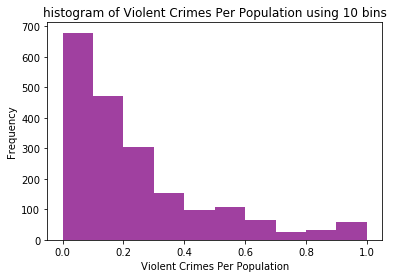

In [28]:
#histogram of Violent Crimes Per Population using 10 bins
n, bins, patches = plt.hist(dataset['ViolentCrimesPerPop'], 10, facecolor='purple', alpha=0.75)
plt.title('histogram of Violent Crimes Per Population using 10 bins')
plt.xlabel("Violent Crimes Per Population"),dataset['ViolentCrimesPerPop']
plt.ylabel("Frequency")
plt.show()

### Clean Data
* Remove all question marks and replace with empty string (NAN).
* Convert columns type object to number.  This way I do not throw away any columns.
* Fill nan in each column with column mean.

In [29]:
# Remove all question marks from this data set
for attName in dataset.columns[1:]:
    dType = dataset[attName].dtype
    if dType == object:
        dataset[attName] = dataset[attName].str.replace('?', '')

In [30]:
# Convert feature columns to float
for attName in dataset.columns[5:]:
    dType = dataset[attName].dtype
    if dType == object:
        dataset[attName] = pd.to_numeric(dataset[attName], errors='coerce')

In [31]:
dataset.PolicBudgPerPop.describe()

count    319.000000
mean       0.195078
std        0.164718
min        0.000000
25%        0.110000
50%        0.150000
75%        0.220000
max        1.000000
Name: PolicBudgPerPop, dtype: float64

In [32]:
# Convert all feature columns to float, and replace nan with mean
for attName in dataset.columns[5:]:
    dType = dataset[attName].dtype
    if pd.isnull(dataset[attName]).any():
        dataset[attName] = dataset[attName].fillna(dataset[attName].mean())

In [33]:
# Sanity check mean is still the same 0.195078
dataset.PolicBudgPerPop.describe()

count    1994.000000
mean        0.195078
std         0.065796
min         0.000000
25%         0.195078
50%         0.195078
75%         0.195078
max         1.000000
Name: PolicBudgPerPop, dtype: float64

In [34]:
dataset.to_csv("cleanedCrimes.csv", sep=',', encoding='utf-8')

### Separate data to target and features.

In [35]:
dataset.target=dataset['ViolentCrimesPerPop'] 
dataset.features=dataset.iloc[:, 5:]                        
print(dataset.target.shape)
print(dataset.features.shape)
print(dataset.features.columns)

(1994,)
(1994, 123)
Index(['fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24',
       ...
       'PolicAveOTWorked', 'LandArea', 'PopDens', 'PctUsePubTrans',
       'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop'],
      dtype='object', length=123)


## Run Regression Models
### Linear Regression - Ordinary Least Squares

In [36]:
# Linear Regression-Ordinary Least Squares
from sklearn.linear_model import LinearRegression

# fit a linear regression model to the data
model_LR = LinearRegression()
model_LR.fit(dataset.features, dataset.target)
print(model_LR)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [37]:
# make predictions
expected_LR = dataset.target
predicted_LR = model_LR.predict(dataset.features)

In [38]:
# summarize the fit of the model
print("Mean Squared Error:", mean_squared_error(expected_LR, predicted_LR))
print("Mean Absolute Error:", mean_absolute_error(expected_LR, predicted_LR))
print("R2 Score:", r2_score(expected_LR, predicted_LR))
print("Explained Variance Score:", explained_variance_score(expected_LR, predicted_LR))
print("Score:", model_LR.score(dataset.features, dataset.target))
print("Coef:", model_LR.intercept_, model_LR.coef_)

Mean Squared Error: 0.016265772585
Mean Absolute Error: 0.0901160898484
R2 Score: 0.700196295284
Explained Variance Score: 0.700196295284
Score: 0.700196295284
Coef: 1.31715769397 [ -1.54007763e-03   1.38255577e-01  -1.84989195e-02   1.86084455e-01
  -4.75943283e-02  -2.78083048e-02   5.65394709e-02   1.11489868e-01
  -2.47560418e-01  -1.31306171e-01   4.99327158e-02  -2.47365632e-01
   4.71100179e-02  -1.96927623e-01  -1.98981689e-01   4.60100180e-02
  -1.81963561e-01   8.64321852e-02   5.88299473e-03  -9.72136299e-02
   3.04809641e-01   1.16557081e-01  -3.66653474e-01  -3.67146936e-02
  -3.48098027e-02   2.12738498e-02   4.36879380e-02   3.19521858e-02
   8.47412430e-02  -1.78419864e-01  -1.11073934e-01   7.35003752e-02
   5.71636038e-02   8.31686344e-03   2.56373460e-01  -6.26065679e-02
  -2.10350658e-02   6.11594631e-02   1.08136527e-01   4.21588383e-01
   2.28034032e-01   1.29366227e-01  -5.10204533e-01  -1.08628324e-01
   2.61258642e-02  -3.39471077e-01  -2.81427759e-02  -4.31004

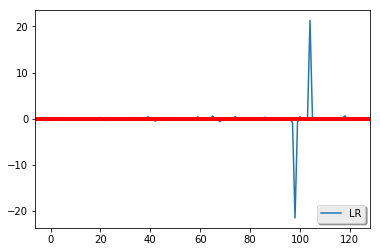

In [39]:
fig, ax = plt.subplots()
plt.plot(model_LR.coef_, label='LR')
plt.axhline(linewidth=4, color='r') # for reference
legend = ax.legend(loc='lower right', shadow=True)
plt.show()

#### Run Cross Validation to check Overfitting
The results show wide variance so the model is overfitting.

In [40]:
from sklearn.cross_validation import train_test_split

X = dataset.features
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [41]:
model_LR.fit(X_train, y_train)
y_train_pred = model_LR.predict(X_train)
y_test_pred = model_LR.predict(X_test)

In [42]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('MSE train: %.3f, test: %.3f' % (
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))
print('R2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
print('EVS train: %.3f, test: %.3f' % (
        explained_variance_score(y_train, y_train_pred),
        explained_variance_score(y_test, y_test_pred)))
print('Score train: %.3f, test: %.3f' % (
        model_LR.score(dataset.features, dataset.target),
        model_LR.score(dataset.features, dataset.target)))

MSE train: 0.016, test: 0.020
MSE train: 0.090, test: 0.100
R2 train: 0.714, test: 0.632
EVS train: 0.714, test: 0.632
Score train: 0.690, test: 0.690


In [43]:
scores = cross_val_score(model_LR, X_train, y_train, cv=10)
print("Cross Validation Score for each K", scores)
scores.mean()  

Cross Validation Score for each K [  0.62319478   0.67190588   0.58577935   0.67703256   0.62183926
   0.59875191   0.62617742   0.507694   -80.41997715   0.69601645]


-7.4811585521446036

### Ridge Regression

In [44]:
from sklearn.linear_model import Ridge

# fit a ridge regression model to the data
model_RG = Ridge()

#### Grid Search on Ridge Regression model
Grid search tries different alpha parameters in this case from 0.005 to 2 and cross validation to find best accuracy score.
In this case it found alpha = 2 had the best accuracy score from rank_test_score list.  The bigger alpha means more penalty, we tries to find balance between variance and bias.  

In [45]:
# use a full grid over several parameters and cross validate 5 times
from sklearn.model_selection import GridSearchCV
param_grid = {"alpha": [.005,.01,.1, .5, 1, 2]}
#param_grid={"alpha": [1,10,1]} this does a range 1 through 10 changes by a factor of 1. 
#param_grid={"alpha": [.01,1,.05]} this does a range 1 through 1 changes by a factor of .05

# run grid search
grid_search = GridSearchCV(model_RG, param_grid=param_grid, n_jobs=-1, cv=5)
grid_search.fit(dataset.features, dataset.target)
print("Grid Scores:", grid_search.cv_results_)
print("Best:", grid_search.best_params_)  

Grid Scores: {'split0_test_score': array([ 0.61360965,  0.61362527,  0.61471389,  0.6170949 ,  0.61815672,
        0.61854762]), 'split1_test_score': array([ 0.6093986 ,  0.61047535,  0.62248928,  0.63463062,  0.63759874,
        0.63851109]), 'split2_test_score': array([ 0.70508419,  0.70634039,  0.71231628,  0.71632772,  0.71649403,
        0.71523832]), 'split3_test_score': array([ 0.67025116,  0.67093324,  0.67403382,  0.67504295,  0.675444  ,
        0.67587639]), 'split4_test_score': array([ 0.61205741,  0.61292546,  0.61893418,  0.62513941,  0.62867966,
        0.63235736]), 'mean_test_score': array([ 0.64209526,  0.64287495,  0.64851232,  0.65366141,  0.65528797,
        0.65611807]), 'std_test_score': array([ 0.03884496,  0.03903575,  0.03851809,  0.03714415,  0.03620386,
        0.03513799]), 'rank_test_score': array([6, 5, 4, 3, 2, 1]), 'split0_train_score': array([ 0.71390528,  0.71385424,  0.7130426 ,  0.71024548,  0.7075885 ,
        0.70357939]), 'split1_train_score': ar

In [46]:
# fit a ridge regression model to the data
model_RG = Ridge(alpha=2)
model_RG.fit(dataset.features, dataset.target)
print(model_RG)

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [47]:
# make predictions
expected_RG = dataset.target
predicted_RG= model_RG.predict(dataset.features)

In [48]:
print("Mean Squared Error:", mean_squared_error(expected_RG, predicted_RG))
print("Mean Absolute Error:", mean_absolute_error(expected_RG, predicted_RG))
print("R2 Score:", r2_score(expected_RG, predicted_RG))
print("Explained Variance Score:", explained_variance_score(expected_RG, predicted_RG))
print("Score:", model_RG.score(dataset.features, dataset.target))
print("Coef:", model_RG.intercept_, model_RG.coef_)

Mean Squared Error: 0.0167596438641
Mean Absolute Error: 0.09062218902
R2 Score: 0.691093472879
Explained Variance Score: 0.691093472879
Score: 0.691093472879
Coef: 0.532578664965 [ -1.75988971e-03  -2.03567382e-02   2.59944141e-02   1.57519567e-01
  -6.54024239e-02  -3.09583234e-02   4.29918091e-02   1.87420030e-02
  -1.26645621e-01  -3.28656156e-02   4.26831151e-02  -3.40611917e-02
   4.04215394e-02   4.06503061e-02  -9.62367961e-02   3.23383033e-02
  -1.35319746e-01   5.23819338e-02   1.94610377e-02  -7.98242960e-02
   4.58242398e-02  -2.05733328e-02  -1.11077219e-01  -2.68865323e-02
  -2.94855845e-02   2.66370699e-02   4.25388161e-02   2.59359579e-02
  -5.33047246e-03  -1.23440969e-01  -7.62007289e-02   4.62147134e-02
   2.81913846e-02  -1.86528853e-02   1.12424286e-01  -4.77203753e-02
  -9.99339973e-03   4.33210202e-02   3.49499904e-02   1.24739617e-01
   1.03620587e-01  -7.02493826e-02  -1.05879633e-02   3.15373864e-02
  -7.22444045e-02  -1.50298111e-01  -5.23857771e-02  -1.74979

#### The Ridge Regression has smaller coefficients than Linear Regression.

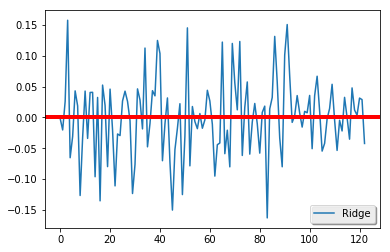

In [49]:
fig, ax = plt.subplots()
plt.plot(model_RG.coef_, label='Ridge')
plt.axhline(linewidth=4, color='r') # for reference
legend = ax.legend(loc='lower right', shadow=True)
plt.show()

#### Run Cross Validation to check Overfitting
The results show wide variance so the model is overfitting.  Mean is .65 and there is one result at .54.

In [50]:
model_RG.fit(X_train, y_train)
y_train_pred = model_RG.predict(X_train)
y_test_pred = model_RG.predict(X_test)
scores = cross_val_score(model_RG, X_train, y_train, cv=10)
print("Cross Validation Score for each K", scores)
scores.mean()  

Cross Validation Score for each K [ 0.701294    0.69835047  0.61471662  0.69777452  0.65171593  0.62480538
  0.64317186  0.54001428  0.64313832  0.68686007]


0.65018414419784998

In [51]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('MSE train: %.3f, test: %.3f' % (
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))
print('R2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
print('EVS train: %.3f, test: %.3f' % (
        explained_variance_score(y_train, y_train_pred),
        explained_variance_score(y_test, y_test_pred)))
print('Score train: %.3f, test: %.3f' % (
        model_RG.score(dataset.features, dataset.target),
        model_RG.score(dataset.features, dataset.target)))

MSE train: 0.016, test: 0.019
MSE train: 0.090, test: 0.097
R2 train: 0.702, test: 0.640
EVS train: 0.702, test: 0.640
Score train: 0.683, test: 0.683


### Lasso Regression

In [52]:
from sklearn.linear_model import Lasso
model_LAS = Lasso()

#### Grid Search on Lasso
This time Grid Search picked alpha = .005

In [53]:
# use a full grid over several parameters and cross validate 5 times
from sklearn.model_selection import GridSearchCV
param_grid = {"alpha": [.005,.01,.1, .5, 1, 2]}
#param_grid={"alpha": [1,10,1]} this does a range 1 through 10 changes by a factor of 1. 
#param_grid={"alpha": [.01,1,.05]} this does a range 1 through 1 changes by a factor of .05

# run grid search
grid_search = GridSearchCV(model_LAS, param_grid=param_grid, n_jobs=-1, cv=5)
grid_search.fit(dataset.features, dataset.target)
print("Grid Scores:", grid_search.cv_results_)
print("Best:", grid_search.best_params_)  

Grid Scores: {'split0_test_score': array([  5.46645285e-01,   4.97148617e-01,  -8.27313888e-07,
        -8.27313888e-07,  -8.27313888e-07,  -8.27313888e-07]), 'split1_test_score': array([ 0.59043305,  0.54309189, -0.01196901, -0.01196901, -0.01196901,
       -0.01196901]), 'split2_test_score': array([  6.66693036e-01,   6.11348904e-01,  -2.03624241e-04,
        -2.03624241e-04,  -2.03624241e-04,  -2.03624241e-04]), 'split3_test_score': array([ 0.62970507,  0.57812376, -0.00256005, -0.00256005, -0.00256005,
       -0.00256005]), 'split4_test_score': array([ 0.60277421,  0.55609948, -0.00363055, -0.00363055, -0.00363055,
       -0.00363055]), 'mean_test_score': array([ 0.60725237,  0.55716306, -0.00367283, -0.00367283, -0.00367283,
       -0.00367283]), 'std_test_score': array([ 0.04004359,  0.03789437,  0.00437341,  0.00437341,  0.00437341,
        0.00437341]), 'rank_test_score': array([1, 2, 3, 3, 3, 3]), 'split0_train_score': array([ 0.63025375,  0.57715885,  0.        ,  0.        ,

In [54]:
model_LAS = Lasso(alpha=.005)
model_LAS.fit(dataset.features, dataset.target)
print(model_LAS)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


In [55]:
# make predictions
expected_LAS = dataset.target
predicted_LAS = model_LR.predict(dataset.features)

In [56]:
# summarize the fit of the model
print("Mean Squared Error:", mean_squared_error(expected_LAS, predicted_LAS))
print("Mean Absolute Error:", mean_absolute_error(expected_LAS, predicted_LAS))
print("R2 Score:", r2_score(expected_LAS, predicted_LAS))
print("Explained Variance Score:", explained_variance_score(expected_LAS, predicted_LAS))
print("Score:", model_LAS.score(dataset.features, dataset.target))
print("Coef:", model_LAS.intercept_, model_LAS.coef_)

Mean Squared Error: 0.0168245987013
Mean Absolute Error: 0.0925825237167
R2 Score: 0.689896253335
Explained Variance Score: 0.689905245295
Score: 0.615374105146
Coef: 0.497126939647 [-0.00136611  0.         -0.          0.         -0.20146398  0.          0.
 -0.         -0.         -0.          0.          0.          0.02151714
 -0.         -0.         -0.         -0.          0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.          0.
 -0.          0.          0.          0.          0.         -0.          0.
 -0.         -0.         -0.          0.         -0.          0.040332    0.
  0.          0.          0.         -0.         -0.30877405 -0.         -0.
 -0.         -0.          0.          0.20328591  0.          0.          0.
  0.          0.          0.          0.          0.          0.         -0.
  0.          0.          0.          0.         -0.          0.         -0.
  0.01264064  0.         -0.          0.04279364 -0.

#### Lasso reduced the number of features to add to the model as we can see in plot below.  Lasso coefficients are small segments of Ridge regression line.

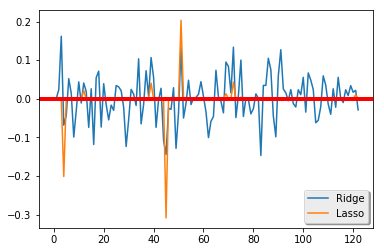

In [57]:
fig, ax = plt.subplots()
plt.plot(model_RG.coef_, label='Ridge')
plt.plot(model_LAS.coef_, label='Lasso')
plt.axhline(linewidth=4, color='r') # for reference
legend = ax.legend(loc='lower right', shadow=True)
plt.show()

#### Run Cross Validation to check Overfitting
The variance is much less than Ridge.  All ten results are within 4% of the mean.  

In [58]:
model_LAS.fit(X_train, y_train)
y_train_pred = model_LAS.predict(X_train)
y_test_pred = model_LAS.predict(X_test)
scores = cross_val_score(model_LAS, X_train, y_train, cv=10)
print("Cross Validation Score for each K", scores)
scores.mean()  

Cross Validation Score for each K [ 0.65330619  0.625218    0.58575201  0.6402722   0.62865529  0.56990759
  0.59690714  0.5813888   0.61513158  0.6238728 ]


0.61204115965580264

In [59]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('MSE train: %.3f, test: %.3f' % (
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))
print('R2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
print('EVS train: %.3f, test: %.3f' % (
        explained_variance_score(y_train, y_train_pred),
        explained_variance_score(y_test, y_test_pred)))
print('Score train: %.3f, test: %.3f' % (
        model_LAS.score(dataset.features, dataset.target),
        model_LAS.score(dataset.features, dataset.target)))

MSE train: 0.020, test: 0.021
MSE train: 0.101, test: 0.102
R2 train: 0.625, test: 0.608
EVS train: 0.625, test: 0.608
Score train: 0.620, test: 0.620


### ElasticNet Regression

In [60]:
from sklearn.linear_model import ElasticNet
model_EN = ElasticNet()

#### Grid Search on ElasticNet
Grid Search picks alpha = 0.005

In [61]:
# use a full grid over several parameters and cross validate 5 times
from sklearn.model_selection import GridSearchCV
param_grid = {"alpha": [.005,.01,.1, .5, 1, 2]}
#param_grid={"alpha": [1,10,1]} this does a range 1 through 10 changes by a factor of 1. 
#param_grid={"alpha": [.01,1,.05]} this does a range 1 through 1 changes by a factor of .05

# run grid search
grid_search = GridSearchCV(model_EN, param_grid=param_grid, n_jobs=-1, cv=5)
grid_search.fit(dataset.features, dataset.target)
print("Grid Scores:", grid_search.cv_results_)
print("Best:", grid_search.best_params_)  

Grid Scores: {'split0_test_score': array([  5.78164675e-01,   5.49914081e-01,  -8.27313888e-07,
        -8.27313888e-07,  -8.27313888e-07,  -8.27313888e-07]), 'split1_test_score': array([ 0.61780121,  0.58952507, -0.01196901, -0.01196901, -0.01196901,
       -0.01196901]), 'split2_test_score': array([  6.87097131e-01,   6.62703615e-01,  -2.03624241e-04,
        -2.03624241e-04,  -2.03624241e-04,  -2.03624241e-04]), 'split3_test_score': array([ 0.65978355,  0.63040027, -0.00256005, -0.00256005, -0.00256005,
       -0.00256005]), 'split4_test_score': array([ 0.62858208,  0.60081066, -0.00363055, -0.00363055, -0.00363055,
       -0.00363055]), 'mean_test_score': array([ 0.63428859,  0.60667368, -0.00367283, -0.00367283, -0.00367283,
       -0.00367283]), 'std_test_score': array([ 0.03713866,  0.03809451,  0.00437341,  0.00437341,  0.00437341,
        0.00437341]), 'rank_test_score': array([1, 2, 3, 3, 3, 3]), 'split0_train_score': array([ 0.65606366,  0.62907594,  0.        ,  0.        ,

In [62]:
model_EN = ElasticNet(alpha=.005)
model_EN.fit(dataset.features, dataset.target)
print(model_EN)

ElasticNet(alpha=0.005, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


In [63]:
# make predictions
expected_EN = dataset.target
predicted_EN = model_EN.predict(dataset.features)

In [64]:
print("Mean Squared Error:", mean_squared_error(expected_EN, predicted_EN))
print("Mean Absolute Error:", mean_absolute_error(expected_EN, predicted_EN))
print("R2 Score:", r2_score(expected_EN, predicted_EN))
print("Explained Variance Score:", explained_variance_score(expected_EN, predicted_EN))
print("Score:", model_EN.score(dataset.features, dataset.target))
print("Coef:", model_EN.intercept_, model_EN.coef_)

Mean Squared Error: 0.0194003317046
Mean Absolute Error: 0.0965809080858
R2 Score: 0.642421453554
Explained Variance Score: 0.642421453554
Score: 0.642421453554
Coef: 0.368664360003 [-0.00173066  0.         -0.          0.05781793 -0.14879276  0.          0.
 -0.         -0.         -0.          0.          0.          0.03294456
 -0.         -0.         -0.         -0.          0.          0.01616216
 -0.         -0.         -0.          0.         -0.         -0.          0.
  0.          0.          0.          0.          0.          0.         -0.
  0.         -0.         -0.         -0.          0.         -0.
  0.07551418  0.          0.          0.02719692  0.         -0.02974863
 -0.17823518 -0.03159657 -0.         -0.         -0.0018059   0.
  0.18984371  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.          0.          0.          0.
  0.         -0.          0.         -0.          0.09057556  0.         -0.
  0.093

#### Elastic Net coefficients are also subset of Ridge Regression because Elastic Net reduced the number of features.

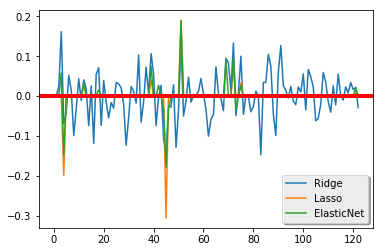

In [65]:
fig, ax = plt.subplots()
plt.plot(model_RG.coef_, label='Ridge')
plt.plot(model_LAS.coef_, label='Lasso')
plt.plot(model_EN.coef_, label='ElasticNet')
plt.axhline(linewidth=4, color='r') # for reference
legend = ax.legend(loc='lower right', shadow=True)
plt.show()

#### Run Cross Validation to check Overfitting
Less overfitting than Ridge.  All results are 4% from the mean.

In [66]:
model_EN.fit(X_train, y_train)
y_train_pred = model_EN.predict(X_train)
y_test_pred = model_EN.predict(X_test)
scores = cross_val_score(model_EN, X_train, y_train, cv=10)
print("Cross Validation Score for each K", scores)
scores.mean() 

Cross Validation Score for each K [ 0.67075153  0.66199615  0.59277921  0.67533707  0.64488255  0.59741952
  0.62282122  0.59019109  0.64041672  0.65335323]


0.63499482812754748

In [67]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('MSE train: %.3f, test: %.3f' % (
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))
print('R2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
print('EVS train: %.3f, test: %.3f' % (
        explained_variance_score(y_train, y_train_pred),
        explained_variance_score(y_test, y_test_pred)))
print('Score train: %.3f, test: %.3f' % (
        model_EN.score(dataset.features, dataset.target),
        model_EN.score(dataset.features, dataset.target)))

MSE train: 0.019, test: 0.020
MSE train: 0.097, test: 0.098
R2 train: 0.651, test: 0.624
EVS train: 0.651, test: 0.625
Score train: 0.643, test: 0.643


### Least Angle Regression 

In [68]:
#LARS Regression Model- Least Angle Regression model
from sklearn.linear_model import Lars
model_LAR = Lars(n_nonzero_coefs=7)
model_LAR.fit(dataset.features, dataset.target)
print(model_LAR)

Lars(copy_X=True, eps=2.2204460492503131e-16, fit_intercept=True,
   fit_path=True, n_nonzero_coefs=7, normalize=True, positive=False,
   precompute='auto', verbose=False)


In [69]:
# make predictions
expected_LAR = dataset.target
predicted_LAR = model_LAR.predict(dataset.features)

In [70]:
# summarize the fit of the model
print("Mean Squared Error:", mean_squared_error(expected_LAR, predicted_LAR))
print("Mean Absolute Error:", mean_absolute_error(expected_LAR, predicted_LAR))
print("R2 Score:", r2_score(expected_LAR, predicted_LAR))
print("Explained Variance Score:", explained_variance_score(expected_LAR, predicted_LAR))
print("Score:", model_LAR.score(dataset.features, dataset.target))
print("Coef:", model_LAR.intercept_, model_LAS.coef_)

Mean Squared Error: 0.0213361093477
Mean Absolute Error: 0.102520683407
R2 Score: 0.606742034954
Explained Variance Score: 0.606742034954
Score: 0.606742034954
Coef: 0.502055478695 [-0.00273476  0.         -0.          0.         -0.19909966  0.          0.
 -0.         -0.         -0.          0.          0.          0.02765399
 -0.         -0.         -0.         -0.          0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.          0.
 -0.          0.          0.          0.          0.         -0.          0.
 -0.         -0.         -0.          0.         -0.          0.04107972
  0.          0.          0.          0.         -0.         -0.30593808
 -0.         -0.         -0.         -0.          0.          0.19049338
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -0.          0.          0.          0.          0.
 -0.          0.         -0.          0.          0.         -0. 

#### Least Angle Regression coefficients are also subset of Ridge Regression.  I defined to leave seven features.

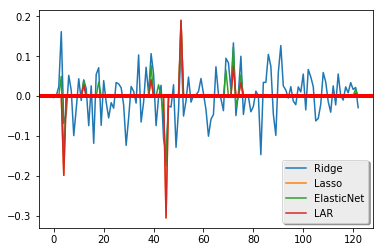

In [71]:
fig, ax = plt.subplots()
plt.plot(model_RG.coef_, label='Ridge')
plt.plot(model_LAS.coef_, label='Lasso')
plt.plot(model_EN.coef_, label='ElasticNet')
plt.plot(model_LAS.coef_, label='LAR')
plt.axhline(linewidth=4, color='r') # for reference
legend = ax.legend(loc='lower right', shadow=True)
plt.show()

#### Run Cross Validation to check Overfitting
Less overfitting than Ridge.  All results are within 5% from the mean.

In [72]:
model_LAR.fit(X_train, y_train)
y_train_pred = model_LAR.predict(X_train)
y_test_pred = model_LAR.predict(X_test)
scores = cross_val_score(model_LAR, X_train, y_train, cv=10)
print("Cross Validation Score for each K", scores)
scores.mean() 

Cross Validation Score for each K [ 0.64902383  0.59640807  0.57791356  0.63491898  0.61541295  0.58131182
  0.58818768  0.58696939  0.61339029  0.61342148]


0.60569580657424971

In [73]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('MSE train: %.3f, test: %.3f' % (
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))
print('R2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
print('EVS train: %.3f, test: %.3f' % (
        explained_variance_score(y_train, y_train_pred),
        explained_variance_score(y_test, y_test_pred)))
print('Score train: %.3f, test: %.3f' % (
        model_LAR.score(dataset.features, dataset.target),
        model_LAR.score(dataset.features, dataset.target)))

MSE train: 0.021, test: 0.021
MSE train: 0.101, test: 0.103
R2 train: 0.618, test: 0.604
EVS train: 0.618, test: 0.605
Score train: 0.614, test: 0.614


### Random Forest Regressor
Random Forest Regressor has the highest R2 and smallest Mean Squared Error.

In [74]:
from sklearn.ensemble import RandomForestRegressor

model_forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)
model_forest.fit(dataset.features, dataset.target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=-1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [75]:
expected_forest = dataset.target
predicted_forest = model_forest.predict(dataset.features)

In [76]:
# summarize the fit of the model
print("Mean Squared Error:", mean_squared_error(expected_forest, predicted_forest))
print("Mean Absolute Error:", mean_absolute_error(expected_forest, predicted_forest))
print("R2 Score:", r2_score(expected_forest, predicted_forest))
print("Explained Variance Score:", explained_variance_score(expected_forest, predicted_forest))
print("Score:", model_forest.score(dataset.features, dataset.target))

Mean Squared Error: 0.00253424278696
Mean Absolute Error: 0.0345440220662
R2 Score: 0.953289929992
Explained Variance Score: 0.953342978084
Score: 0.953289929992


#### Run Cross Validation to check Overfitting
Less overfitting than Ridge but more than Lasso, Elastic Net, and Least Angle Regression.  This is because all 10 folds accuracy results are within 8% from the mean.

In [77]:
model_forest.fit(X_train, y_train)
y_train_pred = model_forest.predict(X_train)
y_test_pred = model_forest.predict(X_test)
scores = cross_val_score(model_forest, X_train, y_train, cv=10)
print("Cross Validation Score for each K", scores)
scores.mean() 

Cross Validation Score for each K [ 0.68503902  0.64853043  0.56310821  0.72065542  0.6087769   0.65080189
  0.62883499  0.57772762  0.66982124  0.67751189]


0.64308075984280877

In [78]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('MSE train: %.3f, test: %.3f' % (
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))
print('R2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
print('EVS train: %.3f, test: %.3f' % (
        explained_variance_score(y_train, y_train_pred),
        explained_variance_score(y_test, y_test_pred)))
print('Score train: %.3f, test: %.3f' % (
        model_forest.score(dataset.features, dataset.target),
        model_forest.score(dataset.features, dataset.target)))

MSE train: 0.003, test: 0.020
MSE train: 0.035, test: 0.098
R2 train: 0.953, test: 0.634
EVS train: 0.953, test: 0.634
Score train: 0.858, test: 0.858


### Summary

The best model is ElasticNet Regression with alpha set to 0.005, and 10-fold cross validation mean score of 63.5%. Here are why:

* The Lasso, ElasticNet, and Least Angle Regression both reduced number of features.  The ridge Regression did not reduce the number of features.
* 10-fold cross validation test showed ElasticNet has all 10 accuracy scores within 2% of the mean. Ridge regression and random forest scores are more than 2% from their means.
* The grid search ran models with several alpha parameters with 5-fold cross validation.  It picked alpha = 0.005 as the optimal penalty for ElasticNet model. The bigger alpha means more penalty, we tries to find balance between variance and bias. 


                                   Table 1. Regression Models Results
| Regression | Parameters| Mean Squared Error| Mean Absolute Error| R^2 Score| Explained Variance Score| Score|10-fold CV Score|
| :---------:|:-----:|:------------------:|:------------------:|:-------:|:-----------------------:|:----:|------------------:|
| Linear Regression-OLS |   | 0.0163 | 0.090 | 0.700 | 0.700 | 0.700 |       |   
| Ridge Regression      | alpha=2 | 0.0167 | 0.091 | 0.691 | 0.691 | 0.691 | 0.650 |   
| Lasso Regression  | alpha=.005 | 0.0168 | 0.093 | 0.690 | 0.690 | 0.615 | 0.612 |
| ElasticNet Regression  | alpha=.005 | 0.0194 | 0.0966 | 0.642 | 0.642 | 0.642 | 0.635 |
| Least Angle Regression | n_nonzero_coefs=7 | 0.0213 | 0.103 | 0.607 | 0.607 | 0.607 | 0.606 |
| Random Forest Regressor | n_estimators=1000,criterion='mse'| 0.003 | 0.035 | 0.953 | 0.953 | 0.953 | 0.643 |


# END